In [1]:
import sys
from KeckTools import *
%qtconsole

In [2]:
##### Simulation parameters #####
# Sizes
nPx = 512
D = 10.95

lambda_wfs = 1.65e-6                # H-band WFSing
# Atmosphere
seeing = 0.5 #0.75" gives 0.13m r0 at 500nm. 
L0 = 80 # meter
windSpeed = 10                      # m/s
lambda_ref = 500e-9                 # Reference wavelength (i.e. for seeing)

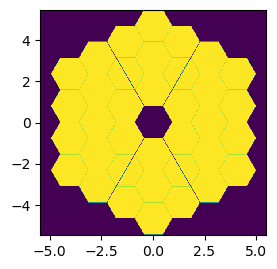

In [3]:
##### Setup grids and pupils #####
# High resolution pupil
pupil_grid = make_pupil_grid(nPx,D)

# Keck pupil
keck_aperture, segments = make_keck_aperture(return_segments=True,normalized=False)
pupil = evaluate_supersampled(keck_aperture, pupil_grid, 8)
segments = evaluate_supersampled(segments, pupil_grid, 8)

# Plot pupil
plt.subplot(1,2,1)
imshow_field(pupil)


In [4]:
##### Setup the focal plane propagator for wfs #####
focal_grid = make_focal_grid(q=8, num_airy=8,spatial_resolution=lambda_wfs/D)
propagator = FraunhoferPropagator(pupil_grid, focal_grid)

##### Setup the atmosphere #####
r0 = seeing_to_fried_parameter(seeing)
print(r0)
Cn_squared = Cn_squared_from_fried_parameter(r0,500e-9)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, L0, windSpeed)
layer.t=0 #initiate

0.20213951012215442


In [11]:
# Add segemnted Keck mirror
ksm =SegmentedDeformableMirror(segments)
ksm.flatten()
ksm.random(120E-9)

#HERE ADD IN YOUR MIRROR SHAPE CAN GO ksm.actuators=... following https://github.com/ehpor/hcipy/blob/master/hcipy/optics/segmented_mirror.py

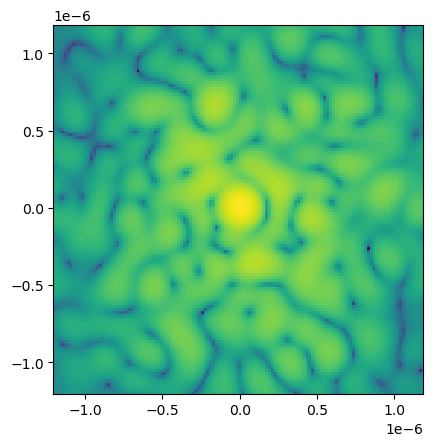

In [12]:
# okay lets propogate a wavefront (electric field)
# Make wavefront
wf = Wavefront(pupil,lambda_wfs)
#optional propogate through atmosphere we made
#wf_turb=layer.forward(wf)

#propogate through primary mirror
#wf_ksm=ksm.forward(wf_turb) --> uncomment to use with atmosphere to get seeing limited performanace
wf_ksm=ksm.forward(wf) #comment if you use the atmosphere

#propogate to the focal plane and plot
wf_sci=propagator.forward(wf_ksm)
image=wf_sci.intensity
imshow_field(np.log10(image))